<a href="https://colab.research.google.com/github/AnantasiiaAleks/A-B_tests/blob/main/Aleksandrovskaya_M5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Множественное тестирование</b></h3>


## Импорт библиотек

In [73]:
import numpy as np
import pandas as pd

import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as ticker
from tqdm import tqdm
from sklearn import preprocessing
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set_theme()

## Импорт данных

In [49]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

In [ ]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


In [ ]:
data.describe()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
count,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,3230.000000,6000.000000
mean,0.842000,2.887167,8.463445e+07,0.661833,31.776667,1.019184e+07,0.729102,0.460160
std,0.364771,2.850285,8.022130e+07,0.473125,32.546372,3.120066e+05,0.444492,0.153727
min,0.000000,0.000000,1.765712e+06,0.000000,2.000000,9.824378e+06,0.000000,0.000000
25%,1.000000,1.000000,1.092669e+07,0.000000,10.000000,1.009639e+07,0.000000,0.351787
50%,1.000000,2.000000,4.301600e+07,1.000000,17.000000,1.017716e+07,1.000000,0.451588
75%,1.000000,4.000000,1.588318e+08,1.000000,32.000000,1.026920e+07,1.000000,0.562556
max,1.000000,9.000000,3.459271e+08,1.000000,100.000000,2.065792e+07,1.000000,1.000000


<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, опираясь уже **НЕ** только на визуализацию. Само задание выполнить на языке **Python**.
   

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить (drop_duplicates).
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Сколько их?

In [50]:
data = data.drop_duplicates()
data = data.dropna()

In [51]:
# Функция удаления выбросов

def remove_outliners(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  clear_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  print(f'Количество удаленных выбросов: {len(df) - len(clear_df)}')
  return clear_df

In [52]:
# YOUR CODE
# Чистим выбросы по признаку home_cost
data1 = remove_outliners(data, 'home_cost')
# Чистим выбросы по признаку salary
data2 = remove_outliners(data1, 'salary')
# Чистим выбросы по признаку happyness
clear_data = remove_outliners(data2, 'happyness')

Количество удаленных выбросов: 8
Количество удаленных выбросов: 0
Количество удаленных выбросов: 16


In [ ]:
clear_data.describe()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
count,3206.000000,3206.000000,3.206000e+03,3206.0000,3206.000000,3.206000e+03,3206.000000,3206.000000
mean,0.843731,2.829382,8.319519e+07,0.6466,31.776669,1.017988e+07,0.728634,0.457397
std,0.363167,2.817356,8.045858e+07,0.4781,32.279136,1.191011e+05,0.444734,0.150246
min,0.000000,0.000000,1.765712e+06,0.0000,3.000000,9.838047e+06,0.000000,0.038685
25%,1.000000,1.000000,9.622692e+06,0.0000,10.000000,1.009299e+07,0.000000,0.351843
50%,1.000000,2.000000,4.172994e+07,1.0000,17.000000,1.017271e+07,1.000000,0.449071
75%,1.000000,4.000000,1.573104e+08,1.0000,32.000000,1.026503e+07,1.000000,0.559527
max,1.000000,9.000000,3.459271e+08,1.0000,100.000000,1.051235e+07,1.000000,0.871872


In [53]:
# Функция для преобразования денег в удобочитаемый вид на графиках
def format_money(x, pos):
  return f'{int(x)/1000000:,}'

In [54]:
alpha = 0.05

# Проверка гипотез

# Изучение датасета
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">

<b>Задание:</b>    
    
Перед вами уже знакомый датасет, который был дан в прошлых домашних заданиях. Вы уже научились применить подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно.
    

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием.

In [ ]:
# Формируем выборки профессия-зарплата
homemaker = clear_data[clear_data["profession"] == "Homemaker"]["salary"].values
marketing = clear_data[clear_data["profession"] == "Marketing"]["salary"].values
healthcare = clear_data[clear_data["profession"] == "Healthcare"]["salary"].values
executive = clear_data[clear_data["profession"] == "Executive"]["salary"].values

Признак Homemaker: Статистики= 0.995, p=0.2772682105085563
Нормальное распределение (не отвергаем H0)
Признак Marketing: Статистики= 0.995, p=0.2573578069114054
Нормальное распределение (не отвергаем H0)
Признак Healthcare: Статистики= 0.989, p=0.0058897649844529745
Не нормальное распределение (отвергаем H0)
Признак Executive: Статистики= 0.992, p=0.0703492709955266
Нормальное распределение (не отвергаем H0)


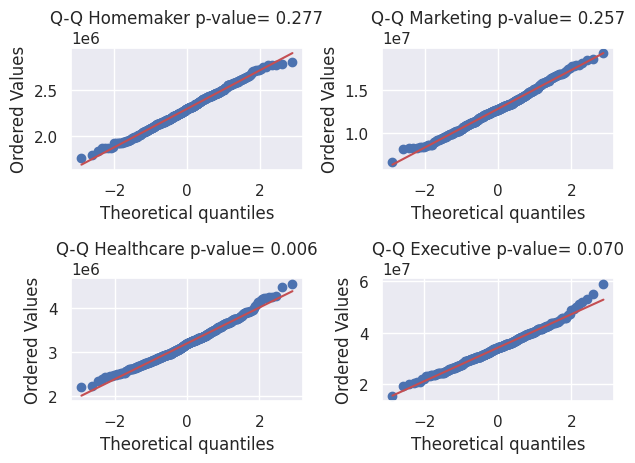

In [ ]:
# Проверка на нормальность каждой выборки

cols = {'Homemaker':homemaker, 'Marketing':marketing, 'Healthcare':healthcare, 'Executive':executive}

for idx, (name, col) in enumerate(cols.items()):
  stat, p_val = sps.shapiro(col)
  print(f'Признак {name}: Статистики={stat: .3f}, p={p_val}')
  if p_val > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name} p-value={p_val: .3f}')

plt.tight_layout()
plt.show()


In [ ]:
# Приводим признак Healthcare в нормальное распределение путем логарифмирования

log_healthcare = np.log2(abs(healthcare)+1)

log_stat, log_p = sps.shapiro(log_healthcare)
print(f'Статистики={log_stat: .3f}, p={log_p}')
if log_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

Статистики= 0.998, p=0.9054324647996896
Нормальное распределение (не отвергаем H0)


In [ ]:
# Тест Левене на гомоскедастичность

levene_stat, levene_p = sps.levene(homemaker, marketing, log_healthcare, executive)
print(f'Статистики={levene_stat: .3f}, p={levene_p}')
if levene_p > alpha:
  print('Дисперсии равны (не отвергаем H0), можно применять ДА')
else:
  print('Дисперсии различаются (отвергаем H0), ДА применять нельзя')

Статистики= 469.653, p=2.815625838751972e-213
Дисперсии различаются (отвергаем H0), ДА применять нельзя


Статистик 1352.9291760089327, p_value 4.820149045313248e-293
Средние зарплаты отличаются


<ipython-input-15-567ff15c1e05>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=labs)


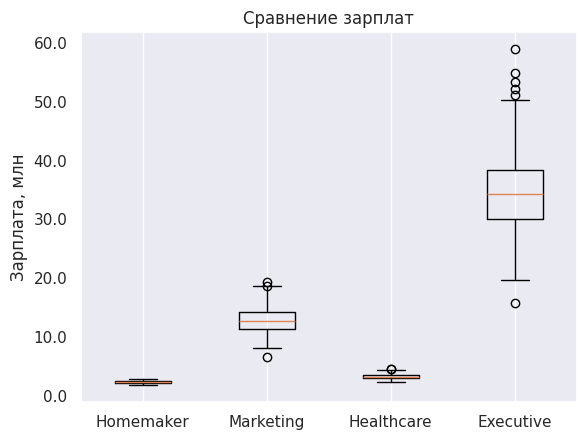

In [ ]:
# Проводим тест Крускала-Уоллиса для выборок

kr_statistic, kr_p_value = sps.kruskal(homemaker, marketing, healthcare, executive)
print(f'Статистик {kr_statistic}, p_value {kr_p_value}')

if kr_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние зарплаты отличаются')

# Гистограмма
df = [homemaker, marketing, healthcare, executive]
labs = ['Homemaker', 'Marketing', 'Healthcare', 'Executive']
plt.boxplot(df, labels=labs)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат')
plt.ylabel('Зарплата, млн')
plt.grid(axis='y')

# Показ графика
plt.show()

In [74]:
dt = pd.DataFrame({
    'salary': np.concatenate([homemaker, marketing, healthcare, executive]),
    'profession': ['Homemaker'] * len(homemaker) +
                  ['Marketing'] * len(marketing) +
                  ['Healthcare'] * len(healthcare) +
                  ['Executive'] * len(executive)
})

# Выполняем тест Тьюки
tukey_result = pairwise_tukeyhsd(dt['salary'], dt['profession'])

# Выводим результаты
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
  group1     group2      meandiff    p-adj      lower          upper      reject
--------------------------------------------------------------------------------
 Executive Healthcare -31089276.8536    0.0 -31721834.8565 -30456718.8507   True
 Executive  Homemaker -31982740.4577    0.0 -32622596.4823  -31342884.433   True
 Executive  Marketing -21504715.8734    0.0 -22157981.6684 -20851450.0784   True
Healthcare  Homemaker    -893463.604 0.0011  -1508116.2375   -278810.9706   True
Healthcare  Marketing   9584560.9803    0.0   8955960.6888  10213161.2718   True
 Homemaker  Marketing  10478024.5843    0.0   9842080.8512  11113968.3174   True
--------------------------------------------------------------------------------


Значение p-value сильно меньше alpha, поэтому мы можем уверенно отвергнуть гипотезу о том, что между представителями таких профессий как, Homemaker, Marketing, Healthcare и Executive в среднем зарплаты не отличаются между собой. Отличия заметны и на представленном графике.
Проведенный post-hoc-тест Тьюки так же показывает значимые различия между каждой профессией, что указывает на то, что профессия действительно влияет на уровень дохода.  
Возможно прокомментировать каждую категорию:
- Homemaker: Средние зарплаты значительно ниже в сравнении с другими категориями. Коробка узкая, что говорит о низкой дисперсии.  
- Marketing: зарплаты выше, чем у Homemaker, но всё же ниже, чем у Executive. Разброс значений здесь выше.  
- Healthcare: зарплаты показывают более широкий диапазон, чем у Homemaker, что означает, что в этой категории могут быть как довольно высокие, так и низкие зарплаты.
- Executive: Наиболее высокие зарплаты, с заметными выбросами, что указывает на наличие некоторых людей с очень высокими доходами.

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием.

In [ ]:
 # Формируем выборки профессия-зарплата
doctor = clear_data[clear_data["profession"] == "Doctor"]["salary"].values
entertainment = clear_data[clear_data["profession"] == "Entertainment"]["salary"].values
lawyer = clear_data[clear_data["profession"] == "Lawyer"]["salary"].values

Признак Doctor: Статистики= 0.986, p=0.001199280751526466
Не нормальное распределение (отвергаем H0)
Признак Entertainment: Статистики= 0.990, p=0.02270613220297246
Не нормальное распределение (отвергаем H0)
Признак Lawyer: Статистики= 0.994, p=0.1644063290521126
Нормальное распределение (не отвергаем H0)


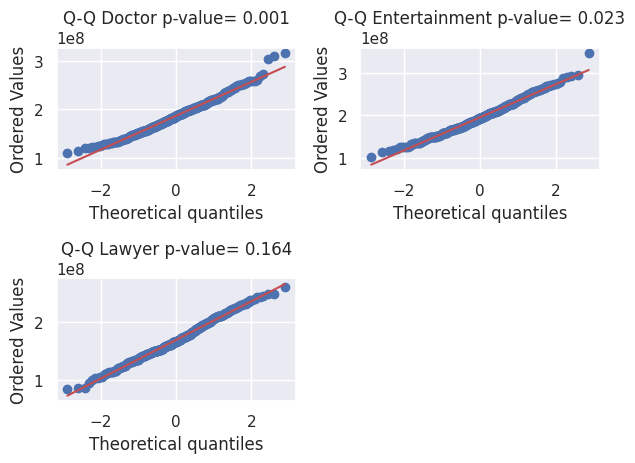

In [ ]:
# Проверка на нормальность каждой выборки

cols = {'Doctor':doctor, 'Entertainment':entertainment, 'Lawyer':lawyer}

for idx, (name, col) in enumerate(cols.items()):
  stat, p_val = sps.shapiro(col)
  print(f'Признак {name}: Статистики={stat: .3f}, p={p_val}')
  if p_val > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name} p-value={p_val: .3f}')

plt.tight_layout()
plt.show()

Статистик 86.6327855399627, p_value 1.541450716815304e-19
Средние зарплаты отличаются


<ipython-input-18-b39c832003f6>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxdata, labels=ls)


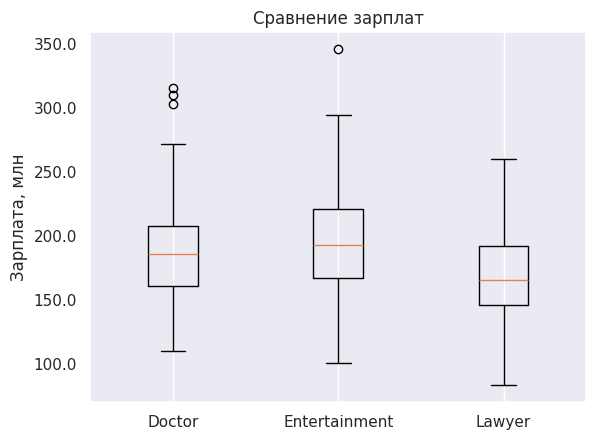

In [ ]:
# Так как из трех выборок лишь одна имеет нормальное распределение, проводим тест Крускала-Уоллиса для выборок

kr_statistic, kr_p_value = sps.kruskal(doctor, entertainment, lawyer)
print(f'Статистик {kr_statistic}, p_value {kr_p_value}')

if kr_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние зарплаты отличаются')

# Боксплот
boxdata = [doctor, entertainment, lawyer]
ls = ['Doctor', 'Entertainment', 'Lawyer']
plt.boxplot(boxdata, labels=ls)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат')
plt.ylabel('Зарплата, млн')
plt.grid(axis='y')

# Показ графика
plt.show()

In [75]:
dt2 = pd.DataFrame({
    'salary': np.concatenate([doctor, entertainment, lawyer]),
    'profession': ['Doctor'] * len(doctor) +
                  ['Entertainment'] * len(entertainment) +
                  ['Lawyer'] * len(lawyer)
})

# Выполняем тест Тьюки
tukey_result = pairwise_tukeyhsd(dt2['salary'], dt2['profession'])

# Выводим результаты
print(tukey_result)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
    group1        group2       meandiff    p-adj      lower          upper      reject
--------------------------------------------------------------------------------------
       Doctor Entertainment   8726030.1354 0.0039    2352885.285  15099174.9859   True
       Doctor        Lawyer -18073062.3847    0.0 -24324294.7723  -11821829.997   True
Entertainment        Lawyer -26799092.5201    0.0 -33180795.3844 -20417389.6558   True
--------------------------------------------------------------------------------------


Значение p-value сильно ниже alpha, поэтому мы уверенно отвергнем гипотезу о том, что между представителями таких профессий как, Doctor, Entertainment и Lawyer в среднем зарплаты не отличаются между собой. Отличия есть и они заметны и а графике, и в проведенном дополнительно post-hoc-тесте Тьюки.  
На графике представлены зарплаты трех категорий профессий: врачей, специалистов развлекательной индустрии и юристов.  
- Врачи (Doctor):
  - Средняя зарплата находится в верхней половине коробки.
  - Наблюдаются выбросы, что может указывать на наличие особенно высоких зарплат среди отдельных врачей.

- Развлекательная индустрия (Entertainment):
  - Зарплата в этой категории наиболее разнообразна, так как размах (разница между максимальной и минимальной зарплатами) довольно велик.
  - График показывает, что большинство выплат находятся около средней линии, но также есть значительные выбросы.

- Юристы (Lawyer):
  - Зарплаты юристов имеют меньший размах по сравнению с другими категориями.


<div class="alert alert-warning">
    
Допустим вы рассматриваете 4 группы населения, отличающихся количеством  детей. Группы следующие.
* **A** - нет детей
* **B** - 1 ребенок
* **C** - от 2 до 4 детей
* **D** - от 5 детей    
    
    
* Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией

In [55]:
# Разбиваем данные на части в соответствии с количеством детей
data_a = clear_data[clear_data["children"] == 0]
data_b = clear_data[clear_data["children"] == 1]
data_c = clear_data[(clear_data["children"] >= 2) & (clear_data["children"] <= 4)]
data_d = clear_data[clear_data["children"] >= 5]

In [ ]:
# создаем выборки по каждой группе
salary0 = data_a['salary'].values
salary1 = data_b['salary'].values
salary2_4 = data_c['salary'].values
salary5 = data_d['salary'].values

Признак without: Статистики= 0.774, p=1.3094445771516048e-30
Не нормальное распределение (отвергаем H0)
Признак one_kid: Статистики= 0.797, p=1.0422398546593142e-28
Не нормальное распределение (отвергаем H0)
Признак two_four_kids: Статистики= 0.807, p=3.215658014904679e-34
Не нормальное распределение (отвергаем H0)
Признак five_kids: Статистики= 0.965, p=1.1638053823421122e-11
Не нормальное распределение (отвергаем H0)


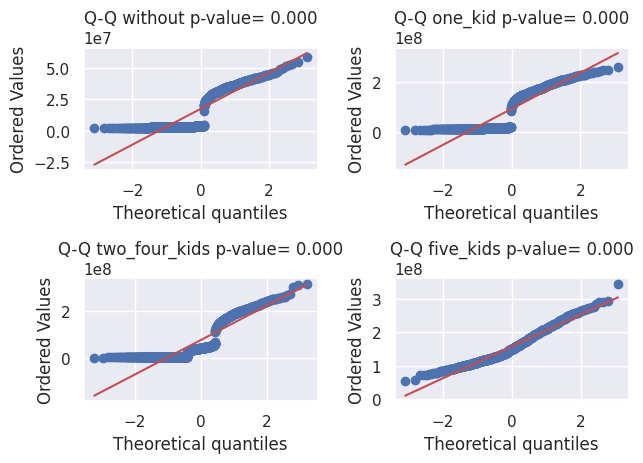

In [ ]:
# Проверка на нормальность каждой выборки

cols = {'without':salary0, 'one_kid':salary1, 'two_four_kids':salary2_4, 'five_kids':salary5}

for idx, (name, col) in enumerate(cols.items()):
  stat, p_val = sps.shapiro(col)
  print(f'Признак {name}: Статистики={stat: .3f}, p={p_val}')
  if p_val > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name} p-value={p_val: .3f}')

plt.tight_layout()
plt.show()

Статистик 931.4049598512775, p_value 1.3644499965054451e-201
Средние зарплаты отличаются


<ipython-input-24-090112a401cc>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxdata, labels=ls, vert=False)


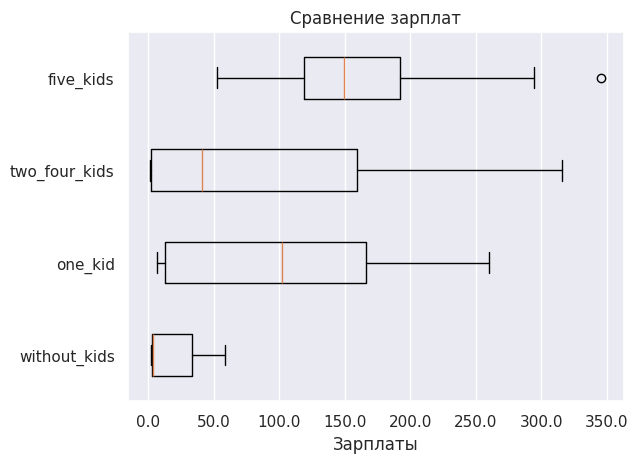

In [ ]:
# Так как выборки не имеют нормального распределения, проводим тест Крускала-Уоллиса для выборок

kr_statistic, kr_p_value = sps.kruskal(salary0, salary1, salary2_4, salary5)
print(f'Статистик {kr_statistic}, p_value {kr_p_value}')

if kr_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние зарплаты отличаются')

# Боксплот
boxdata = [salary0, salary1, salary2_4, salary5]
ls = ['without_kids', 'one_kid', 'two_four_kids', 'five_kids']
plt.boxplot(boxdata, labels=ls, vert=False)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_money))
plt.title('Сравнение зарплат')
plt.xlabel('Зарплаты')
plt.grid(axis='y')


# Показ графика
plt.show()

На диаграмме представлены уроверь зарплаты в зависимости от количества детей. Диаграмма хорошо иллюстрирует отличия среднего дохода населения в зависимости от количества детей в семье. Критерий Краскела-Уоллиса также дает однозначный ответ: средние зарплаты статистически различаются.
- Пять детей (five_kids):
  - Средняя зарплата в этой группе выглядит выше, однако присутствуют выбросы, что может означать наличие отдельных высокооплачиваемых случаев.
- Два-четыре ребенка (two_four_kids):
  - Зарплата в этой категории более равномерная, и большинство зарплат сосредоточено в среднем диапазоне, с небольшими выбросами.
- Один ребенок (one_kid):
  - Эта группа демонстрирует более низкие зарплаты, чем предыдущие категории, с меньшим разбросом значений и сравнительно низкими показателями.
- Без детей (without_kids):
  - Зарплаты в этой категории самые низкие среди всех представленных групп, что может указывать на меньшие расходы.

In [56]:
# создаем выборки по каждой группе
happy0 = data_a['happyness'].values
happy1 = data_b['happyness'].values
happy2_4 = data_c['happyness'].values
happy5 = data_d['happyness'].values

Признак without: Статистики= 0.999, p=0.9123805464090542
Нормальное распределение (не отвергаем H0)
Признак one_kid: Статистики= 0.997, p=0.2092053234666913
Нормальное распределение (не отвергаем H0)
Признак two_four_kids: Статистики= 0.999, p=0.5186710150951458
Нормальное распределение (не отвергаем H0)
Признак five_kids: Статистики= 0.993, p=0.003011123732879843
Не нормальное распределение (отвергаем H0)


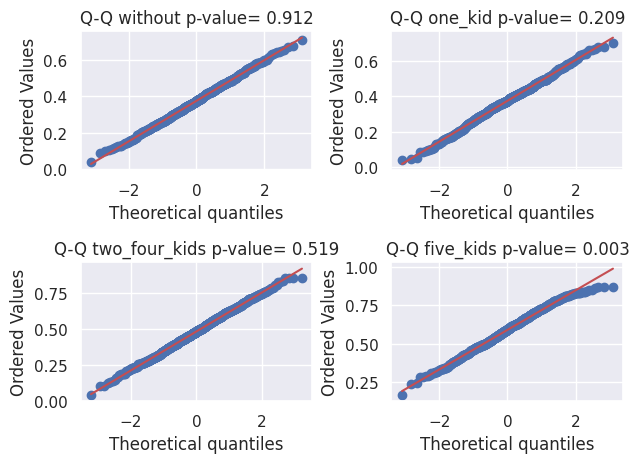

In [57]:
# Проверка на нормальность каждой выборки

cols = {'without':happy0, 'one_kid':happy1, 'two_four_kids':happy2_4, 'five_kids':happy5}

for idx, (name, col) in enumerate(cols.items()):
  stat, p_val = sps.shapiro(col)
  print(f'Признак {name}: Статистики={stat: .3f}, p={p_val}')
  if p_val > alpha:
    print('Нормальное распределение (не отвергаем H0)')
  else:
    print('Не нормальное распределение (отвергаем H0)')
      # Построение Q-Q графика
  plt.subplot(2, 2, idx + 1)
  sps.probplot(col, dist="norm", plot=plt)
  plt.title(f'Q-Q {name} p-value={p_val: .3f}')

plt.tight_layout()
plt.show()

Статистик 991.6986498798542, p_value 1.1374740957130124e-214
Средние зарплаты отличаются


<ipython-input-62-6de4ab719599>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxdata, labels=ls, vert=False)


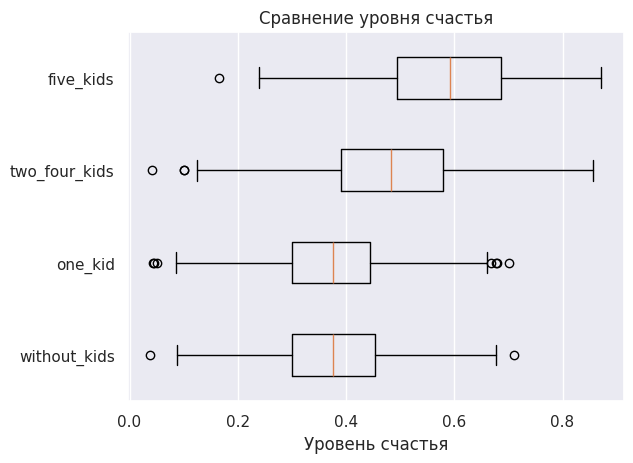

In [62]:
# Так как одна из выборок не имеет нормального распределения (и различные варианты нормализации не срабатывают), проводим тест Крускала-Уоллиса для выборок

kr_statistic, kr_p_value = sps.kruskal(happy0, happy1, happy2_4, happy5)
print(f'Статистик {kr_statistic}, p_value {kr_p_value}')

if kr_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние зарплаты отличаются')

# Боксплот
boxdata = [happy0, happy1, happy2_4, happy5]
ls = ['without_kids', 'one_kid', 'two_four_kids', 'five_kids']
plt.boxplot(boxdata, labels=ls, vert=False)
plt.title('Сравнение уровня счастья')
plt.xlabel('Уровень счастья')
plt.grid(axis='y')


# Показ графика
plt.show()

In [78]:
dt3 = pd.DataFrame({
    'happy': np.concatenate([happy0, happy1, happy2_4, happy5]),
    'kids': ['without'] * len(happy0) +
            ['One'] * len(happy1) +
            ['Two_four'] * len(happy2_4) +
            ['Five'] * len(happy5)
})

# Выполняем тест Тьюки
tukey_result = pairwise_tukeyhsd(dt3['happy'], dt3['kids'])

# Выводим результаты
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
    Five      One   -0.216    0.0 -0.2333 -0.1987   True
    Five Two_four  -0.1061    0.0 -0.1218 -0.0904   True
    Five  without  -0.2149    0.0  -0.232 -0.1978   True
     One Two_four   0.1099    0.0  0.0944  0.1254   True
     One  without   0.0011 0.9982 -0.0158  0.0181  False
Two_four  without  -0.1088    0.0 -0.1241 -0.0935   True
--------------------------------------------------------


In [72]:
t_stat, t_p_value = sps.ttest_ind(happy0, happy1)
print(f'Статистик {t_stat}, p_value {t_p_value}')

if t_p_value > alpha: # Интерпретируем
    print('Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено')
else:
    print('Средние зарплаты отличаются')

Статистик 0.18920184897125744, p_value 0.849961374260677
Одинаковые распределения (не отвергаем H0), значимой разницы не обнаружено


На диаграмме представлено сравнение уровня счастья в зависимости от количества детей у людей.

В целом, диаграмма показывает, что наличие детей может влиять на уровень счастья, причем более высокая численность детей кажется связанной с большей удовлетворенностью.

- Пять детей (five_kids):
  - Уровень счастья в этой группе выглядит достаточно высоким, хотя имеются некоторые выбросы, указывающие на тех, кто чувствует себя особенно счастливыми или наоборот.

- Два-четыре ребенка (two_four_kids):
  - Зарегистрированный уровень счастья наблюдается на среднем уровне, без значительных выбросов, что говорит о большей однородности.

- Один ребенок (one_kid):
  - Уровень счастья чуть ниже, чем в предыдущих группах, и можно заметить небольшое разнообразие в показателях.

- Без детей (without_kids):
  - Эта группа на диаграмме кажется на том же уровне, что и группа с одним ребенком. Проведенные дополнительно тесты Тьюки и Стьюдента для двух выборок с одним ребенком в семье и без детей (обе выборки с нормальным распределением), подтвердили гипотезу об отстутствии статистически значимых различий между этими двумя группами.


# Попытки нормализации массива значений happy5

1) Логарифм  
2) Z-преобразование  
3) Квадратное корневое преобразование  
4) Бокс-кокс  
5) Метод sklearn  
6) Будстреп

In [ ]:
# Приводим выборку happy5 в нормальное распределение путем логарифмирования

log_happy5 = np.log2(abs(happy5)+1)

log_stat, log_p = sps.shapiro(log_happy5)
print(f'Статистики={log_stat: .3f}, p={log_p}')
if log_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

Статистики= 0.988, p=1.730859180884786e-05
Не нормальное распределение (отвергаем H0)


In [ ]:
# Z-преобразование
mean_happy5 = np.mean(happy5)
sko = np.std(happy5)
z_happy5 = list(map(lambda x: (x-mean_happy5) / sko, happy5))

z_stat, z_p = sps.shapiro(z_happy5)
print(f'Статистики={z_stat: .3f}, p={z_p}')
if z_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

Статистики= 0.993, p=0.003011123732879843
Не нормальное распределение (отвергаем H0)


In [ ]:
# Квадратное-корневое преобразование
sqrt_happy5 = np.sqrt(abs(happy5) + 1)

sqrt_stat, sqrt_p = sps.shapiro(sqrt_happy5)
print(f'Статистики={sqrt_stat: .3f}, p={sqrt_p}')
if sqrt_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

Статистики= 0.991, p=0.000375032049317311
Не нормальное распределение (отвергаем H0)


In [ ]:
# Преобразование Бокса-Кокса
happy5_transformed, lambda_param = sps.boxcox(happy5)

# print('Примененное преобразование:', happy5_transformed)
print('Оптимальное значение λ:', lambda_param)

tr_stat, tr_p = sps.shapiro(happy5_transformed)
print(f'Статистики={tr_stat: .3f}, p={tr_p}')
if tr_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

Оптимальное значение λ: 1.1844127633327186
Статистики= 0.994, p=0.005631059404224433
Не нормальное распределение (отвергаем H0)


In [59]:
# Метод sklearn
normalized_happy5 = preprocessing.normalize([happy5])

n_stat, n_p = sps.shapiro(normalized_happy5)
print(f'Статистики={n_stat: .3f}, p={n_p}')
if n_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

Статистики= 0.993, p=0.003011123732881038
Не нормальное распределение (отвергаем H0)


In [58]:
# Будстреп

boot_means = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(500)):
    sample = np.random.choice(happy5, size=len(happy5), replace=True)
    boot_means.append(np.mean(sample))

# Преобразование списка в DataFrame
boot_means = np.array(boot_means)

# Нормализация данных
mean_boot = np.mean(boot_means)
std_boot = np.std(boot_means)

normal_happy5 = (happy5 - mean_boot) / std_boot


nor_stat, nor_p = sps.shapiro(normal_happy5)
print(f'Статистики={nor_stat: .3f}, p={nor_p}')
if nor_p > alpha:
  print('Нормальное распределение (не отвергаем H0)')
else:
  print('Не нормальное распределение (отвергаем H0)')

100%|██████████| 500/500 [00:00<00:00, 23470.15it/s]

Статистики= 0.993, p=0.003011123732878673
Не нормальное распределение (отвергаем H0)
